# Text Assemble

It is observed that 70% of data available to any businesses is unstructured. The first step is collating unstructured data from different sources such as open-ended feedback, phone calls, email support, online chat and social media networks like Twitter, LinkedIn and Facebook. Assembling these data and applying mining/machine learning techniques to analyze them provides valuable opportunities for organizations to build more power into customer experience. 
There are several libraries available for extracting text content from different formats discussed above. By far the best library that provides simple and single interface for multiple formats is ‘textract’ (open source MIT license). Note that as of now this library/package is available for Linux, Mac OS and not Windows. Below is a list of supported formats.

### Reading from PDF

In [1]:
import textract

# Extracting from normal pdf
text = textract.process('Data/pdf/raw_text.pdf', language='eng')

# Extrcting from two columned pdf
text = textract.process('Data/pdf/two_column.pdf', language='eng')

# Extracting from scanned text pdf
text = textract.process('Data/pdf/ocr_text.pdf', method='tesseract', language='eng')

### Reading from JPG

In [2]:
# Extracting from jpg
text = textract.process('Data/jpg/raw_text.jpg', method='tesseract', language='eng')
print (text)

b'EAS TEST\n\nTHIS IS A TEST OF THE NATIONAL\nEMERGENCY ALERT SYSTEM\n\nTHERE IS NO ACTUAL EMERGENCY\n\x0c'


### Extracting from audio file

In [3]:
text = textract.process('Data/wav/raw_text.wav', language='eng')
print ("raw_text.wav: ", text)

text = textract.process('Data/wav/standardized_text.wav', language='eng')
print ("standardized_text.wav: ", text)

raw_text.wav:  b'everything is awesome\n'
standardized_text.wav:  b'a quick brown fox jumps over the lazy dog\n'


### Twitter 

Twitter is a online news and social networking service provider and there are 320 million twitter users with an average of 42 million active twitters every day! (as of 2016, source smartinsights). It is a great source to understand what users are talking about a chosen topic.

#### API access token

- Goto https://apps.twitter.com/
- Click on 'Create New App'
- Fill the required information and click on 'Create your Twitter Application'
- You'll get the access details under 'Keys and Access Tokens' tab

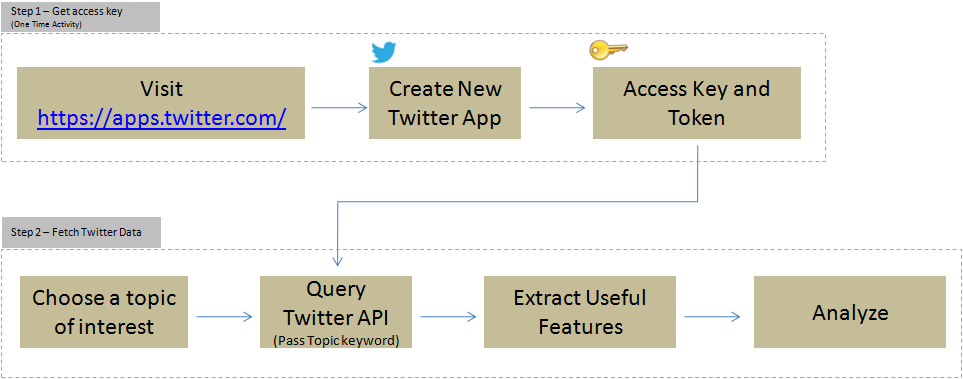

In [4]:
from IPython.display import Image
Image(filename='../Chapter 5 Figures/Fetch_Twitter_Data.png', width=900)

In [5]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

import pandas as pd

In [6]:
#provide your access details below 
access_token = "2345619938-HM3m1sqYnDJSD73QckzGcGr4iiH2ZM8jNa5bdxt"
access_token_secret = "SUOHZrbNyr51grEMIb4oCdttYd9CZhyhDVAgHG8HBqSq7"
consumer_key = "f8FVZR9I59L8X65A8FRy7UqYn"
consumer_secret = "yWeHgwqzRmzjPVcrMhdnS9PxddWz5Oqpoppktk4A6Q5y7ZpGB6"

# establish a connection
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

Let's assume that you would like to understand what is being talking about the iPhone 7 and its camera feature. So let's pull the recent 10 posts.

Note: You can pull historic user posts about a topic for a max of 10 to 15 days only depending on the volume of the posts.

In [7]:
#fetch recent 10 tweets containing words iphone7 camera
fetched_tweets = api.search(q=['iPhone X','iPhoneX','camera'], result_type='recent', lang='en', count=10)
print ("Number of tweets: ", len(fetched_tweets))

Number of tweets:  7


In [8]:
# Print the tweet text
for tweet in fetched_tweets:
    print ('Tweet ID: ', tweet.id)
    print ('Tweet Text: ', tweet.text, '\n')

Tweet ID:  1103941362490081280
Tweet Text:  If you want to get the most out of your #iPhoneX camera, check out our roundup of great iPhone X camera… https://t.co/APj7dV940L 

Tweet ID:  1102897933744332802
Tweet Text:  "However, this time I wasn't carrying my laptop, iPad, camera, lenses etc, instead I had set myself the challenge t… https://t.co/HjqN8PEkeH 

Tweet ID:  1102651287127101440
Tweet Text:  Get The New iPhone X! -&gt; https://t.co/Sh3c6xWg2g #iPhone #iPhoneX #apple #facerecognition #movies #pictures #camera… https://t.co/nslngKFPWM 

Tweet ID:  1102282188383383552
Tweet Text:  Need a new phone?

Check out this deal! 

Refurbished 64gb iPhone X for $599

https://t.co/GTj59VUn3o

#iPhone… https://t.co/akj7tProlR 

Tweet ID:  1102113674255351808
Tweet Text:  RT @TheTechChap: Which has the best Camera? Samsung Galaxy S9 vs iPhone X Camera Review! #GalaxyS9 #iPhoneX #galaxys9camera #s9 https://t.c… 

Tweet ID:  1101946196745084928
Tweet Text:  After experiencing the amazingness 

You can capture useful features onto a dataframe for further analysis if required.

In [9]:
# function to save required basic tweets info to a dataframe
def populate_tweet_df(tweets):
    #Create an empty dataframe
    df = pd.DataFrame() 
    
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name, tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified, tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count, tweets))
    
    # Highly popular user's tweet could possibly seen by large audience, so lets check the popularity of user
    df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df

df = populate_tweet_df(fetched_tweets) 
print (df.head(10))

                    id                                               text  \
0  1103941362490081280  If you want to get the most out of your #iPhon...   
1  1102897933744332802  "However, this time I wasn't carrying my lapto...   
2  1102651287127101440  Get The New iPhone X! -&gt; https://t.co/Sh3c6...   
3  1102282188383383552  Need a new phone?\n\nCheck out this deal! \n\n...   
4  1102113674255351808  RT @TheTechChap: Which has the best Camera? Sa...   
5  1101946196745084928  After experiencing the amazingness of @cynthia...   
6  1101539495600685057  @iMasenkOG @DBZenkai_ ik for sure that android...   

   retweeted                   place      screen_name  verified_user  \
0      False   Ahmadabad City, India       igeeksblog          False   
1      False  West Midlands, England  Luvandlifestyle          False   
2      False                            dealdetectors          False   
3      False                              _Broke_Boys          False   
4      False           

Instead of a topic you can also choose a screen_name focused on a topic, let's look at the posts by the screen name Iphone7review. 

In [10]:
# For help about api look here http://tweepy.readthedocs.org/en/v2.3.0/api.html
fetched_tweets =  api.user_timeline(id='Iphone8review', count=5)

# Print the tweet text
for tweet in fetched_tweets:
    print ('Tweet ID: ', tweet.id)
    print ('Tweet Text: ', tweet.text, '\n')

Tweet ID:  636645153332195328
Tweet Text:  Leaked iPhone 8 Design http://t.co/MCoY6Fb7Cd 

Tweet ID:  636642449243377664
Tweet Text:  RT @UberFacts: Apple has a "secret police" called the Worldwide Loyalty Team that makes sure no employees leak something. 



Glancing through the posts quickly can generally conclude that there is positive comments about camera feature of iPhone 7.